In [78]:
import numpy as np, matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,ExtendedBinnedNLL
from scipy.stats import norm
from scipy.stats import expon
import stats,files

In [79]:
data = stats.toy_Gauss(mean=2, sigma=1,N=10000)

In [80]:
files.write_file('dati2.txt',data.sample)

'success'

<h2>Data

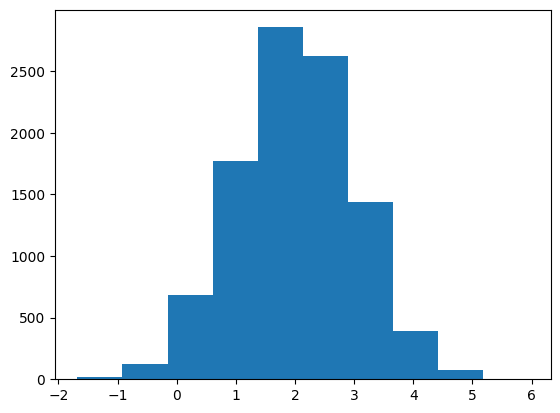

In [81]:
data = files.read_file('dati2.txt')
plt.hist(data)
plt.show()

<h2>Unbinned

In [82]:
def loglikelihood_mean(dati,mean):
    return np.sum( np.log([norm.pdf(x,loc=mean, scale=1) for x in dati]))

In [83]:
def loglikelihood_sigma(dati,sigma):
    return np.sum( np.log([norm.pdf(x, loc=2 ,scale=sigma) for x in dati]))

In [89]:
t_mean = np.linspace(1,3,50)
like_mean = [loglikelihood_mean(data[:1000],i) for i in t_mean]

t_sigma = np.linspace(1e-4,2,50)
like_sigma = [loglikelihood_sigma(data[:1000],i) for i in t_sigma]

C:\Users\Yehan\AppData\Local\Temp\ipykernel_1984\3053274792.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum( np.log([norm.pdf(x, loc=2 ,scale=sigma) for x in dati]))


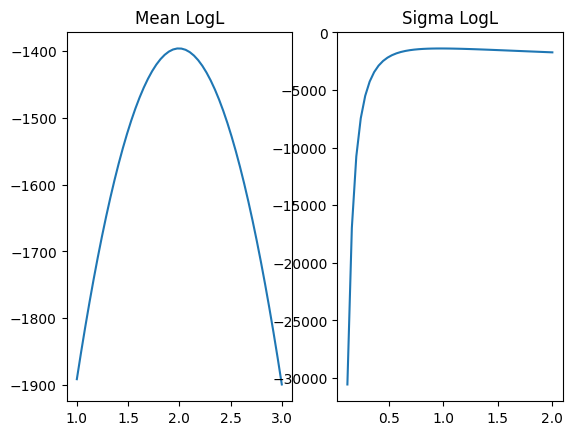

In [90]:
fig,ax = plt.subplots(1,2)

ax[0].plot(t_mean,like_mean)
ax[0].set_title("Mean LogL")

ax[1].plot(t_sigma,like_sigma)
ax[1].set_title("Sigma LogL")

plt.show()

In [91]:
def max_sez_aurea(sample,func,t,prec=.001):

    r = (-1+np.sqrt(5))/2  #golden ratio

    xmin = min(t)
    xmax = max(t)

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(sample,b) < func(sample,a):
            xmin = b
        else: 
            xmax = a

    return xmin,func(sample,xmin)

In [92]:
t_mean = np.linspace(1,3,50)
x_mean,y_mean = max_sez_aurea(data[:1000],loglikelihood_mean,t_mean)

t_sigma = np.linspace(1,3,50)
x_sigma,y_sigma = max_sez_aurea(data[:1000],loglikelihood_mean,t_sigma)

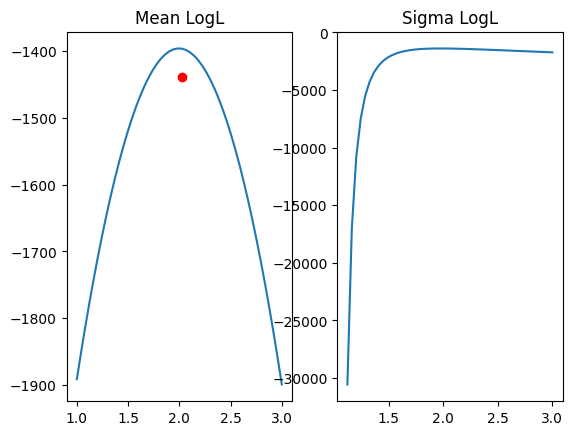

In [93]:
fig,ax = plt.subplots(1,2)

ax[0].plot(t_mean,like_mean)
ax[0].set_title("Mean LogL")
ax[0].scatter(x_mean,y_mean, c='r')

ax[1].plot(t_sigma,like_sigma)
ax[1].set_title("Sigma LogL")
ax[1].scatter(x_sigma,y_sigma, c='r')

plt.show()

<h2>Binned